In [1]:
# Importing all the dependencies required for this Notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
train_data = pd.read_csv('C:/Users/Kaushik/Documents/Kaggle Datasets/Machine Learning/Regression Datasets/House Pricing/train.csv')
test_data = pd.read_csv('C:/Users/Kaushik/Documents/Kaggle Datasets/Machine Learning/Regression Datasets/House Pricing/test.csv')
df_test = pd.DataFrame(test_data)
df_train = pd.DataFrame(train_data)
df_train.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Let us see the columns that contain NaNs
def missing_values():
    temp_dict = dict()
    for i in df_train.columns:
        if df_train[i].isnull().sum() > 0: 
            temp_dict[i] = df_train[i].isnull().sum()
    return temp_dict

In [4]:
df_train.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

In [5]:
missing_values()

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [6]:
def delete_columns(col):
    if df_train[col].isnull().sum() > df_train[col].count()/2:
        del df_train[col]

for col in df_train.columns:
    delete_columns(col)

In [7]:
missing_values()

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81}

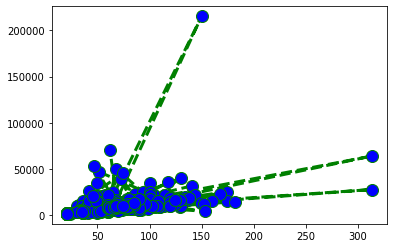

In [8]:

plt.plot(df_train['LotFrontage'],df_train['LotArea'], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()

In [9]:
df_x = df_train[(df_train['LotFrontage'] != 313) & (df_train['LotArea'] < 200000)]
#df_train[df_train['LotFrontage']==313]

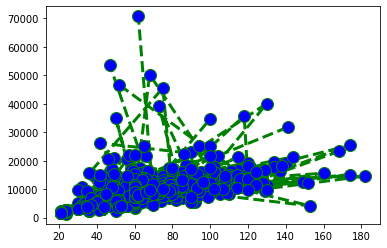

In [10]:
plt.plot(df_x['LotFrontage'],df_x['LotArea'], color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()

In [11]:
# This function predicts the LotFrontage of the missing data values using a Linear Regression model 
# Build a linear regression model with known LotArea and LotFrontage and predicts the LotFrontage for 
# the data with missing values
def fillna_lotfrontage(X_train, y_train):

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    
    return reg.coef_.tolist()[0], reg.intercept_

In [12]:
X_train_list = df_train['LotArea'].dropna()[:1000]
X_train = [[X_train_list[i]] for i in range(len(X_train_list))]
y_train = df_train['LotFrontage'].dropna()[:1000]

w, intercept = fillna_lotfrontage(X_train, y_train)

for i in range(len(df_train["LotFrontage"])):
    if pd.isnull(df_train.loc[i, "LotFrontage"]):
        df_train.loc[i, "LotFrontage"] = df_train.loc[i, "LotArea"]*w + intercept

In [13]:
df_train["MasVnrType"].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [14]:
for i in range(len(df_train["MasVnrType"])):  
    if pd.isnull(df_train.loc[i, "MasVnrType"]) and pd.isnull(df_train.loc[i, "MasVnrArea"]):
        df_train.loc[i, "MasVnrType"] = "None"
        df_train.loc[i, "MasVnrArea"] = 0

In [15]:
missing_values()

{'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81}

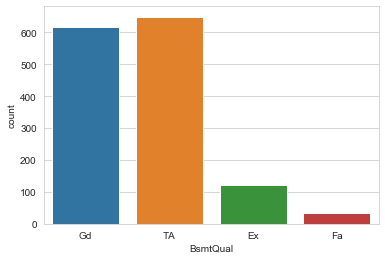

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='BsmtQual',data=df_train)

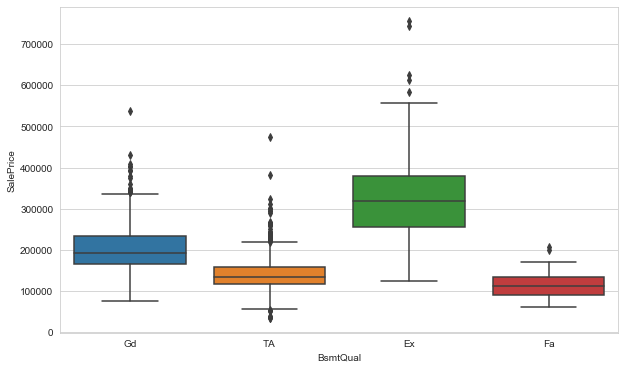

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="BsmtQual", y="SalePrice", data=df_train)

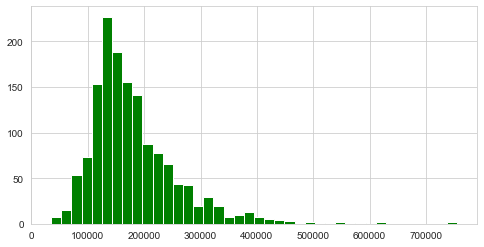

In [18]:
df_train['SalePrice'].hist(color='green',bins=40,figsize=(8,4))

In [19]:
for i in range(len(df_train["BsmtQual"])):  
    if pd.isnull(df_train.loc[i, "BsmtQual"]):
        
        sale_price = df_train.loc[i, "SalePrice"]
        
        if 0 < sale_price < 125000:
            df_train.loc[i, "BsmtQual"] = 'Fa'
        
        elif 125000 < sale_price < 170000:
            df_train.loc[i, "BsmtQual"] = 'TA'
        
        elif 170000 < sale_price < 255000:
            df_train.loc[i, "BsmtQual"] = 'Gd'
            
        elif sale_price > 255000:
            df_train.loc[i, "BsmtQual"] = 'Ex'

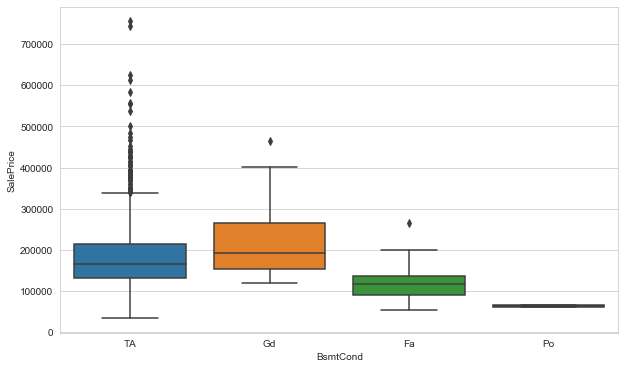

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="BsmtCond", y="SalePrice", data=df_train)

In [21]:
# The other columns related with BsmtQual don't have much clear impact on the SalePrice
# Taking the most important variable on the category into consideration, we drop the other
# related columns: 'BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond'.

delete_columns = ['BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond']


In [22]:
missing_values()

{'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81}

In [23]:
for col in delete_columns:
    del df_train[col]

In [24]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


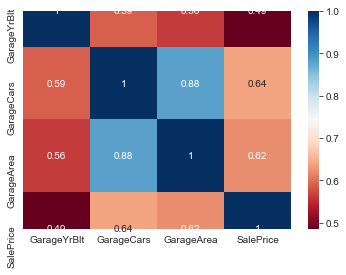

In [25]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', \
                  'SalePrice']
# Let us plot heatplot diagrams to see the correlation of the above variables on the SalePrice
sns.heatmap(df_train[garage_columns].corr(), annot=True, cmap="RdBu")

In [26]:
garage_columns.remove('GarageCars')
garage_columns.remove('SalePrice')
for col in garage_columns:
    # deleting the columns except those two in the garage_columns list we consider 
    del df_train[col]

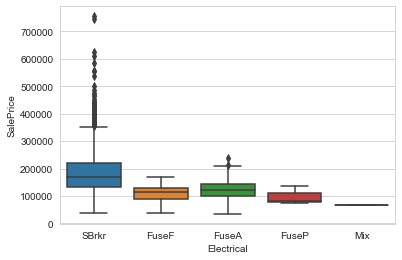

In [27]:
sns.boxplot(x='Electrical', y='SalePrice', data=df_train)

In [28]:
df_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [29]:
for i in range(len(df_train['Electrical'])):
    if pd.isnull(df_train.loc[i, 'Electrical']):
        # print(df_train.loc[i, 'SalePrice'])
        # Checked the value of SalePrice corresponding to the missing Electrical value
        # and the missing value is imputed looking at the above graph
        df_train.loc[i, 'Electrical'] = 'SBrkr'

In [30]:
missing_values()

{}

In [31]:
# Categorical or Numerical ?

In [32]:
variables_list = df_train.columns.tolist()

In [33]:
df_train['Electrical'][1]

'SBrkr'

In [34]:
numerical_vars = []
for col in variables_list:
    try:
        if float(df_train[col][1]).is_integer():
            numerical_vars.append(col)
    except ValueError: pass

categorical_vars = set(variables_list) - set(numerical_vars)

In [35]:
# Let us see number of each type of columns/decorations
len(categorical_vars), len(numerical_vars)

(30, 36)

<Figure size 1008x720 with 0 Axes>

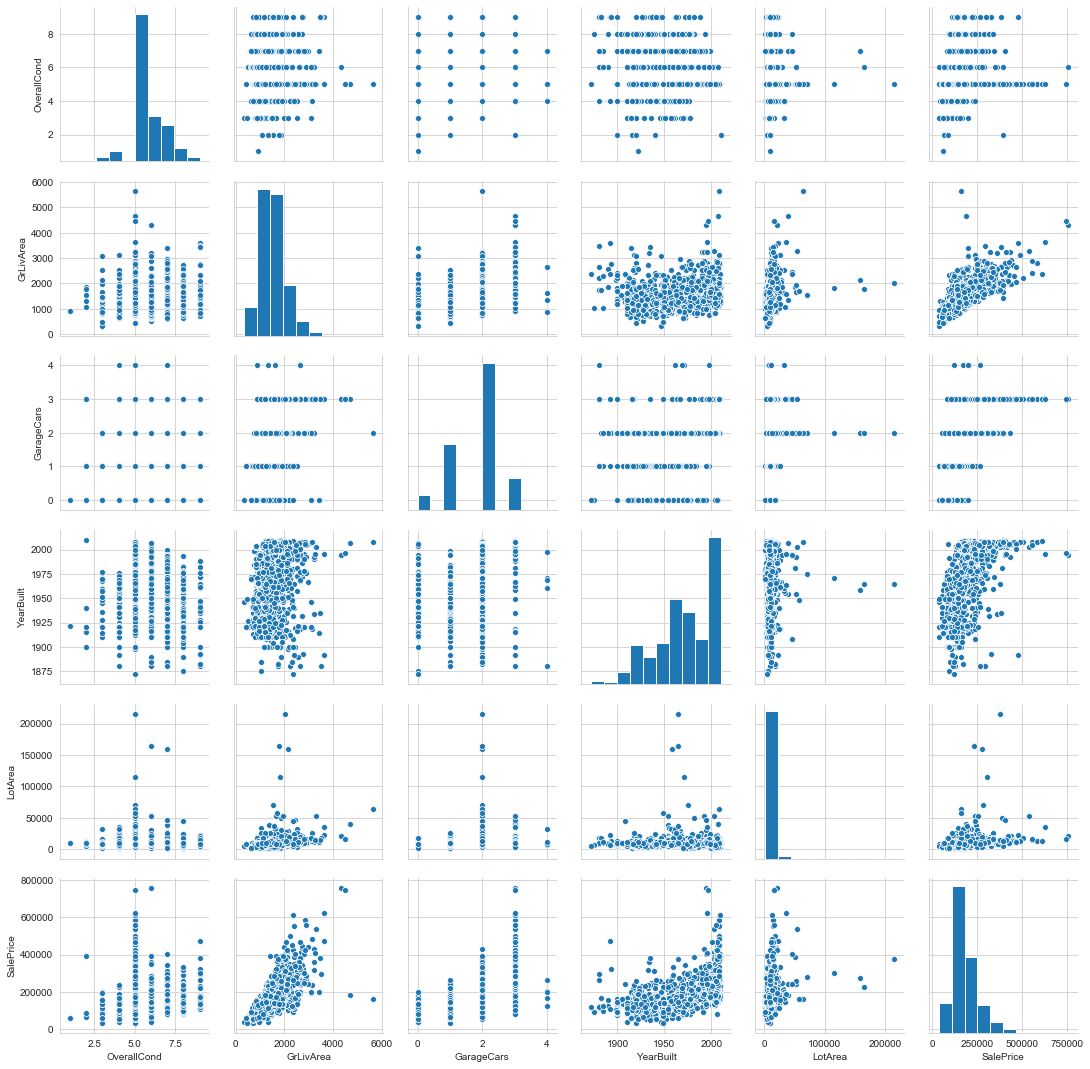

In [36]:
# shortlisting important columns
interesting_cols = ["OverallCond", "GrLivArea", "GarageCars", "YearBuilt", "LotArea", "SalePrice"]

plt.figure(figsize=(14,10))
sns.pairplot(df_train[interesting_cols], dropna=True)
plt.show()

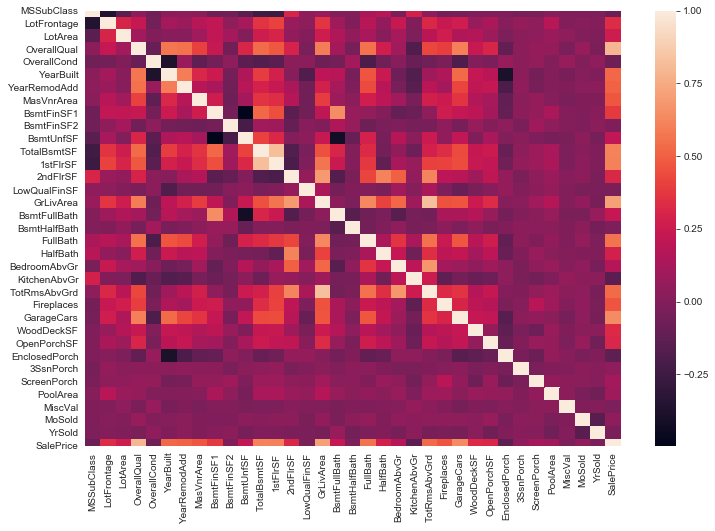

In [37]:
correlation_matrix = df_train.drop(["Id"], axis=1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, square=False)

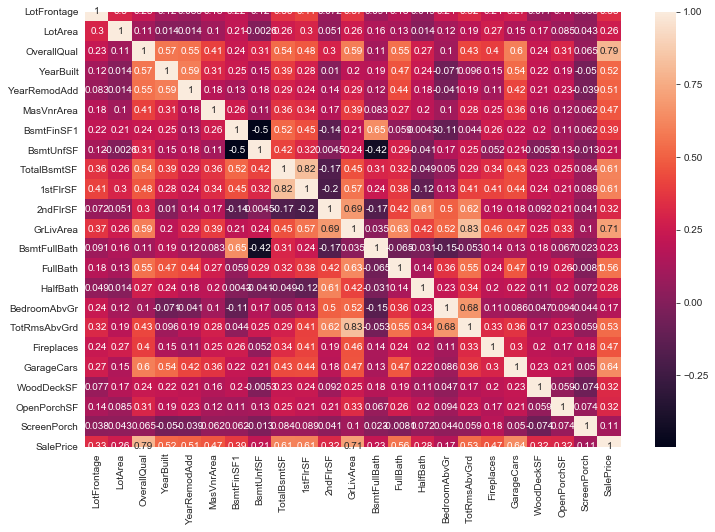

In [38]:
# Let us find out the variable names that have high correlation with SalePrice
# We call these variables important variables.

variables = correlation_matrix.columns
important_variables = []
for row in variables:
    corrl = correlation_matrix.loc[row, 'SalePrice']
    if corrl > 0.1:
        important_variables.append(row)

hp = correlation_matrix.loc[important_variables, important_variables]
plt.figure("Heatmap-Important Variables", figsize=(12,8))
sns.heatmap(hp, annot=True, cbar=True)        

In [39]:
# deleting these columns from the dataframe
for col in ['TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath']:
    del df_train[col]

In [40]:
num_variables = set(numerical_vars) - set(['Id', 'TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath'])

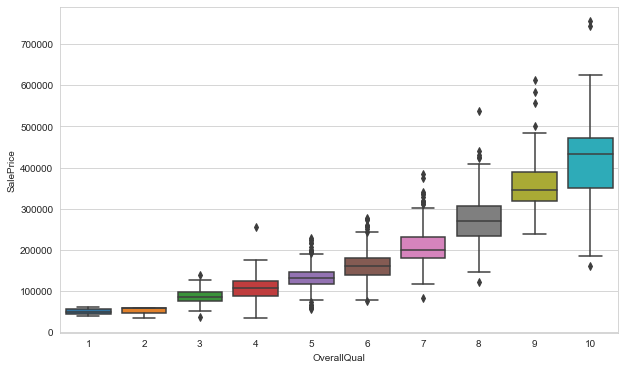

In [41]:
# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=df_train)

C:\Users\Kaushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


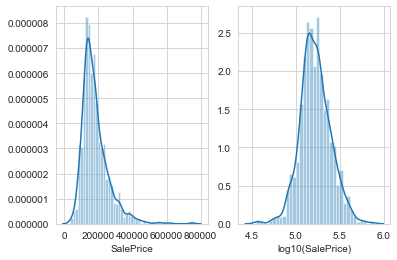

In [42]:
# Data Normalaization
# Normalizing the right skewed SalePrice

fig, ax =plt.subplots(1,2)
sns.distplot(df_train['SalePrice'], ax=ax[0])
sns.distplot(np.log10(df_train['SalePrice']), ax=ax[1])
plt.xlabel('log10(SalePrice)')
fig.show()

In [43]:
df_train.loc[:, 'SalePrice'] = np.round(np.log10(df_train['SalePrice']), 3)

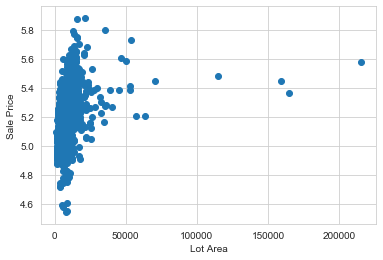

In [44]:
# Plottng the LotArea - SalePrice graph

plt.scatter(df_train["LotArea"], df_train["SalePrice"])
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

In [45]:
# the four point's indices (we drop four rows with index names in following list)
drop_index_list = df_train[df_train['LotArea'] > 100000].index.tolist()
df_train.drop(drop_index_list, inplace=True)

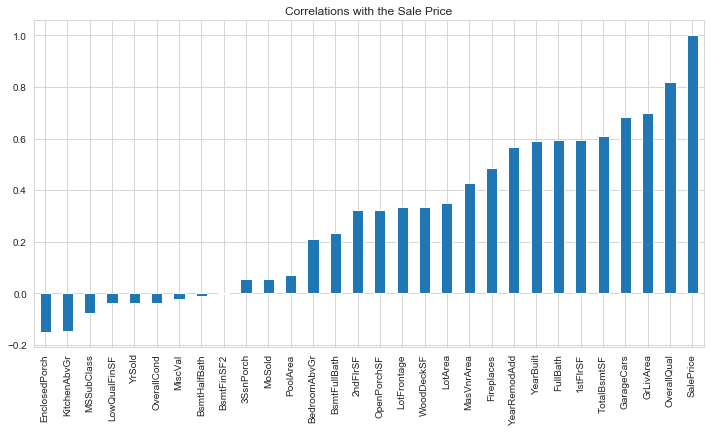

In [46]:
# Corelation with Sales Price
corr_with_SalePrice = df_train.drop(["Id"], axis=1).corr()
plot_data = corr_with_SalePrice["SalePrice"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with the Sale Price")
plt.show()
del plot_data

In [47]:
# creating list of the final numerical columns we are going to consider for the prediction model
num_vars_list = []
for var in num_variables:
    num_vars_list.append(var)

In [48]:
categorical_list = list()
for i in categorical_vars:
    categorical_list.append(i)

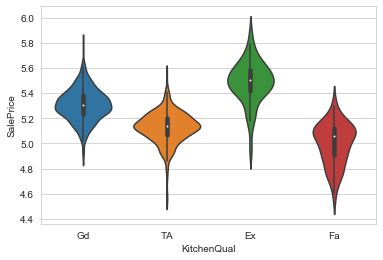

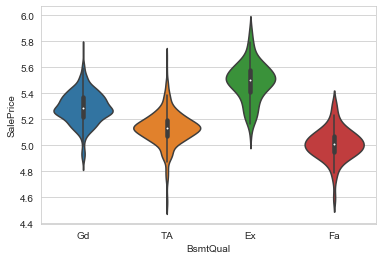

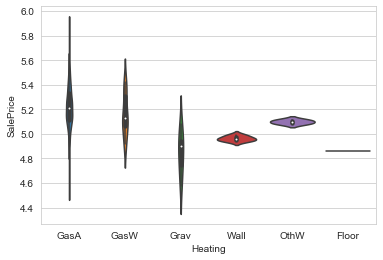

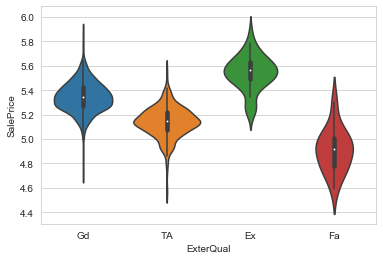

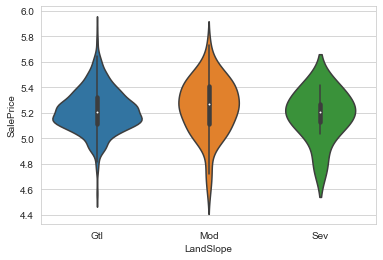

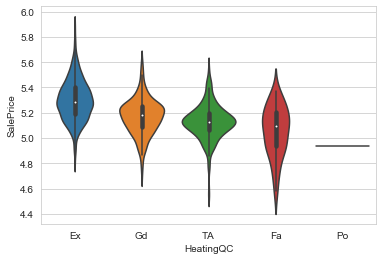

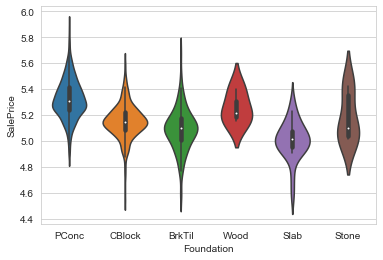

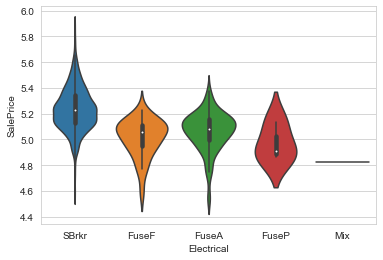

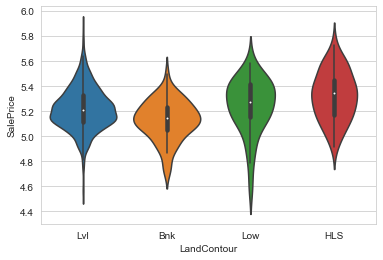

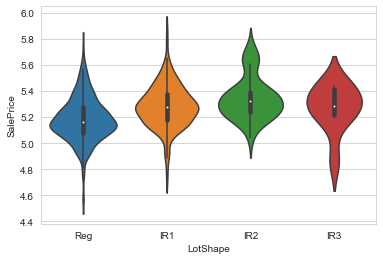

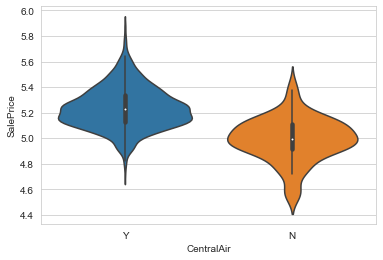

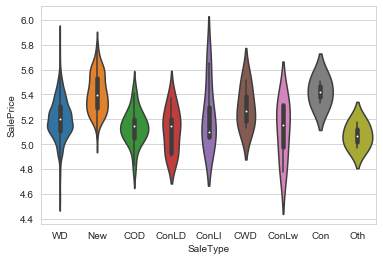

In [49]:
# violinplot: for all columns/decorations in the categorical column list

few_cat_variables = ['KitchenQual', 'BsmtQual', 'Heating', 'ExterQual', 'LandSlope', 'HeatingQC', 'Foundation', 'Electrical', \
                     'LandContour', 'LotShape', 'CentralAir', 'SaleType']
# categorical_list => plotted all the variables in this list before showing only few of them in the above list
for i in range(len(few_cat_variables)):
    sns.violinplot(x=few_cat_variables[i], y='SalePrice', data=df_train)
    plt.show()

In [50]:
important_categorical_vars = ['KitchenQual', 'BsmtQual', 'Heating', 'ExterQual']

# Let us once again categories of these important variables
for col in important_categorical_vars:
    print(col, ": ", df_train[col].unique())

KitchenQual :  ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual :  ['Gd' 'TA' 'Ex' 'Fa']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
ExterQual :  ['Gd' 'TA' 'Ex' 'Fa']


In [51]:
# dataframe now contains only the numerical variables
all_vars_now = num_vars_list + important_categorical_vars
# The df_train ahead contains only these - all_vars_now variables
df_train = df_train[all_vars_now]

In [52]:
# This function takes in the categorical variables and introduces the numerical variable columns for 
# each of the categories for that categorical variables/columns/decorations in the original data
# For each of original categorical columns - will be added separate columns in df_frame for each of the categories
def numerical_columns(cat_var):
    # new DataFrame for the categorical variable cat_var
    df = pd.get_dummies(df_train[cat_var], dummy_na=None)
    df_vars = df.columns
    modified_vars = [(cat_var + "-" + i) for i in df_vars]
    # new columns added in df_frame for each of the categories in cat_var
    for i in range(len(modified_vars)):
        df_train[modified_vars[i]] = pd.Series(df[df_vars[i]]).tolist()
    # making the modified_vars list empty for next cat_var
    modified_vars = []

In [53]:
# Calling numerical_columns function to intoduce new categorical columns as numerical values

for cat_var in important_categorical_vars:
    numerical_columns(cat_var)

In [54]:
# Now deleting the original categorical form of the variables converted into the numerical form
for var in important_categorical_vars:
    del df_train[var]

In [55]:
# we finally have 48 columns in the dataframe
df_train.tail()

,MoSold,GrLivArea,LotFrontage,OverallCond,BedroomAbvGr,Fireplaces,BsmtHalfBath,OverallQual,GarageCars,MSSubClass,...,Heating-Floor,Heating-GasA,Heating-GasW,Heating-Grav,Heating-OthW,Heating-Wall,ExterQual-Ex,ExterQual-Fa,ExterQual-Gd,ExterQual-TA
1455,8,1647,62.0,5,3,1,0,6,2,60,...,0,1,0,0,0,0,0,0,0,1
1456,2,2073,85.0,6,3,2,0,6,2,20,...,0,1,0,0,0,0,0,0,0,1
1457,5,2340,66.0,9,4,2,0,7,1,70,...,0,1,0,0,0,0,1,0,0,0
1458,4,1078,68.0,6,2,0,0,5,1,20,...,0,1,0,0,0,0,0,0,0,1
1459,6,1256,75.0,6,3,0,0,5,1,20,...,0,1,0,0,0,0,0,0,1,0


In [56]:
# Ready to build regression model now

In [57]:
# Importing sklearn methods
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [58]:
df = df_train
df.columns

Index(['MoSold', 'GrLivArea', 'LotFrontage', 'OverallCond', 'BedroomAbvGr',
       'Fireplaces', 'BsmtHalfBath', 'OverallQual', 'GarageCars', 'MSSubClass',
       'KitchenAbvGr', 'MasVnrArea', 'WoodDeckSF', 'LowQualFinSF', '3SsnPorch',
       'FullBath', 'TotalBsmtSF', 'EnclosedPorch', '2ndFlrSF', 'YrSold',
       'BsmtFullBath', 'PoolArea', 'SalePrice', 'MiscVal', 'OpenPorchSF',
       '1stFlrSF', 'LotArea', 'YearRemodAdd', 'BsmtFinSF2', 'YearBuilt',
       'KitchenQual-Ex', 'KitchenQual-Fa', 'KitchenQual-Gd', 'KitchenQual-TA',
       'BsmtQual-Ex', 'BsmtQual-Fa', 'BsmtQual-Gd', 'BsmtQual-TA',
       'Heating-Floor', 'Heating-GasA', 'Heating-GasW', 'Heating-Grav',
       'Heating-OthW', 'Heating-Wall', 'ExterQual-Ex', 'ExterQual-Fa',
       'ExterQual-Gd', 'ExterQual-TA'],
      dtype='object')

In [59]:
# Separating 'SalePrice' column

X_columns = df.columns.tolist()
X_columns.remove('SalePrice')

In [60]:
# The input data for the regression models are:
X = df[X_columns]
y = df['SalePrice']

In [61]:
# The input data: dividing into train (75%) and validation data (25%)

x_train_len = round(X.shape[0]*0.75)
x_train = X[:x_train_len]
x_validation = X[x_train_len:]
y_train = y[:x_train_len]
y_validation = y[x_train_len:]

# print Test and Validation data lenght
print("Train data points: ", x_train_len)
print("Validation data points: ", x_validation.shape[0])

Train data points:  1092
Validation data points:  364


In [62]:
# A class that will define all the regression models as methods
class Models(object):
    
    global seed 
    seed = 34234
    
    # Initialization 
    def __init__(self, x_train, x_validation, y_train, y_validation):
        # changing input as dataframe to list
        self.x_train = [x_train.iloc[i].tolist() for i in range(len(x_train))]
        self.x_validation = [x_validation.iloc[i].tolist() for i in range(len(x_validation))]
        self.y_train = y_train.tolist()
        self.y_validation = y_validation.tolist()
    
    @staticmethod
    def print_info(cross_val_scores, mse):
        print("Cross Validation Scores: ", cross_val_scores)
        print("Mean Squared Error: ", mse)
        
        
    # Linear Regression 
    def linear_regression(self, x_train, x_validation,  y_train, y_validation):
        reg = linear_model.LinearRegression()
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.x_train, self.y_train)
        y_pred_list = reg.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
        print("\nLinear Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
    
        # Random Forest Regression model 
    def random_forest(self, x_train, x_validation,  y_train, y_validation):
        rfr = RandomForestRegressor(n_estimators=8, max_depth=8, random_state=12, verbose=0)
        # X = np.array(X).reshape([-1, 1])
        rfr.fit(self.x_train, self.y_train)
        y_pred_list = rfr.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(rfr, self.x_train, self.y_train, cv=kfold)
        print("\nRandom Forest Regressor")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
    
    # Lasso method 
    def lasso(self, x_train, x_validation,  y_train, y_validation):
        reg = linear_model.Lasso(alpha = 0.1)
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.x_train, self.y_train)
        y_pred_list = reg.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
        print("\nLasso Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
    
    # Gradient Boosing Regressor
    def GBR(self, x_train, x_validation,  y_train, y_validation):
        gbr = GradientBoostingRegressor(n_estimators=175, learning_rate=0.08, max_depth=3, random_state=1232, loss='ls')
        gbr.fit(self.x_train, self.y_train)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(gbr, self.x_train, self.y_train, cv=kfold)
        mse = mean_squared_error(self.y_validation, gbr.predict(self.x_validation))
        print('\nGradient Boosting Regressor')
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse

In [63]:
# We use GridSearchCV to find out the best set of parameters for GBR and use it for the 
# regression model analysis and prediction
parameters = {
    'n_estimators' : [170, 175, 180],
    'learning_rate' : [0.075, 0.08, 0.1],
    'max_depth' : [2, 3, 4]
}

gbr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=5, random_state=232, loss='ls')
gs_cv = GridSearchCV(gbr, parameters).fit(x_train, y_train)
gs_cv.best_params_

C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 175}

In [71]:
methods

['linear_regression', 'random_forest', 'lasso', 'GBR']

In [64]:
from types import FunctionType

methods = [x for x, y in Models.__dict__.items() if type(y) == FunctionType]
methods.remove('__init__')
# Now calling the all regression methods
cross_scores_list, mse_list = [], []
for model in methods:
    reg = Models(x_train, x_validation, y_train, y_validation)
    cross_val_scores, mse = getattr(reg, model)(x_train, x_validation, y_train, y_validation)
    cross_scores_list.append(cross_val_scores)
    mse_list.append(mse)


Linear Regression Model
Cross Validation Scores:  [0.87227481 0.67548551 0.90449058 0.94104202 0.88030722 0.86738322
 0.91915433 0.85141731 0.86277597 0.88193279]
Mean Squared Error:  0.0064297229992790455

Random Forest Regressor
Cross Validation Scores:  [0.82183753 0.77795553 0.83826068 0.92735685 0.85216777 0.81534287
 0.88196663 0.82223551 0.80193776 0.84647557]
Mean Squared Error:  0.00461289963399474

Lasso Regression Model
Cross Validation Scores:  [0.82186924 0.52311534 0.83037383 0.88988438 0.82752513 0.80339763
 0.85436706 0.79259035 0.77183216 0.79459528]
Mean Squared Error:  0.011255861553555437

Gradient Boosting Regressor
Cross Validation Scores:  [0.86840903 0.78029968 0.87108528 0.94428608 0.89270098 0.85569963
 0.92396535 0.85504152 0.8622491  0.89446153]
Mean Squared Error:  0.003575005018961316


In [65]:
plot_df = pd.DataFrame()
for i in range(len(methods)):
    plot_df[methods[i]] = cross_scores_list[i]

In [66]:
plot_df

,linear_regression,random_forest,lasso,GBR
0,0.872275,0.821838,0.821869,0.868409
1,0.675486,0.777956,0.523115,0.780300
2,0.904491,0.838261,0.830374,0.871085
3,0.941042,0.927357,0.889884,0.944286
4,0.880307,0.852168,0.827525,0.892701
5,0.867383,0.815343,0.803398,0.855700
6,0.919154,0.881967,0.854367,0.923965
7,0.851417,0.822236,0.792590,0.855042
8,0.862776,0.801938,0.771832,0.862249
9,0.881933,0.846476,0.794595,0.894462


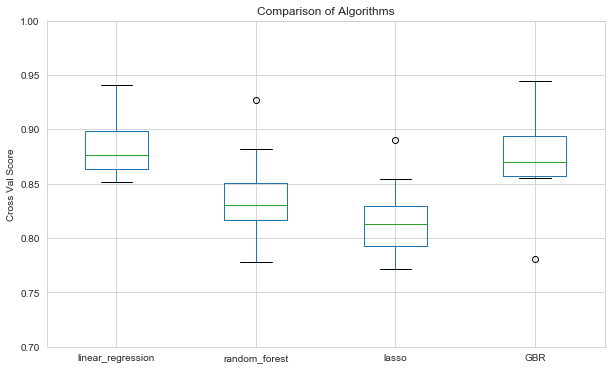

In [67]:
plt.figure(figsize=(10,6))
plt.title('Comparison of Algorithms')
#sns.boxplot(plot_df)
plot_df.boxplot()
plt.ylim(0.7, 1.0)
plt.ylabel('Cross Val Score')
plt.show()

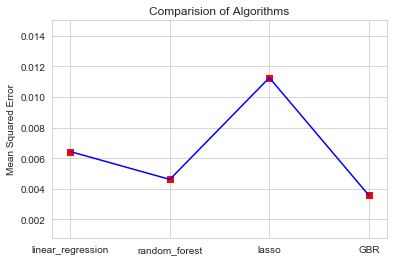

In [68]:
# Plot Mean Squared Error

plt.plot(mse_list, c='b')
plt.title('Comparision of Algorithms')
plt.ylabel('Mean Squared Error')
plt.ylim(0.0008, 0.015)
x = np.array([0,1,2,3])
plt.scatter(x, mse_list, c='r', marker="s")
plt.xticks(x, methods)
plt.show()